## Hata Matrisi
<img src="./assets/hata_matrisi.png" alt="drawing" width="700px"/>

Hata matrisi, aynı zamanda karışıklık matrisi (confusion matrix) olarak da bilinir, bir sınıflandırma modelinin performansını değerlendirmek için kullanılır. Bu matris, modelin doğru ve yanlış sınıflandırmalarını sayısal olarak gösterir ve her sınıf için bu sayımları içerir. Hata matrisini kullanarak modelin doğruluk, kesinlik, geri çağırma ve F1 skoru gibi metriklerini hesaplayabilirsiniz.

## Hata Matrisi Tanımı

Hata matrisi, aşağıdaki şekilde bir matris olarak düzenlenir:

```
                Tahmin Edilen
                 Pozitif   Negatif
Gerçek Pozitif      TP         FN
Gerçek Negatif      FP         TN
```

- **TP (True Positive)**: Gerçek pozitifler. Modelin doğru şekilde pozitif olarak sınıflandırdığı örnekler.
- **FN (False Negative)**: Yanlış negatifler. Modelin yanlış şekilde negatif olarak sınıflandırdığı pozitif örnekler.
- **FP (False Positive)**: Yanlış pozitifler. Modelin yanlış şekilde pozitif olarak sınıflandırdığı negatif örnekler.
- **TN (True Negative)**: Gerçek negatifler. Modelin doğru şekilde negatif olarak sınıflandırdığı örnekler.

## Örnekler ile Hata Matrisi

### 1. İkili Sınıflandırma Örneği

Basit bir ikili sınıflandırma örneği üzerinden hata matrisini hesaplayalım.

```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerçek etiketler ve tahminler
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Hata matrisi hesaplama
cm = confusion_matrix(y_true, y_pred)

# Hata matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

# Başlık ekleme
plt.title("Hata Matrisi")
plt.show()
```

Bu kod parçası, sklearn kütüphanesi kullanılarak gerçek etiketler (`y_true`) ve model tahminleri (`y_pred`) üzerinden hata matrisini hesaplar ve görselleştirir. Yukarıdaki örnekte:

- `TP` = 4 (doğru pozitif)
- `FN` = 1 (yanlış negatif)
- `FP` = 1 (yanlış pozitif)
- `TN` = 4 (doğru negatif)

### 2. Çok Sınıflı Sınıflandırma Örneği

Daha karmaşık bir çok sınıflı sınıflandırma örneği üzerinden hata matrisini inceleyelim.

```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerçek etiketler ve tahminler
y_true = [0, 1, 2, 2, 0, 1, 1, 0, 0, 2]
y_pred = [0, 2, 2, 2, 0, 1, 1, 1, 0, 0]

# Hata matrisi hesaplama
cm = confusion_matrix(y_true, y_pred)

# Hata matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)

# Başlık ekleme
plt.title("Hata Matrisi (Çok Sınıflı)")
plt.show()
```

Bu kod parçası, üç sınıflı bir problem için gerçek etiketler (`y_true`) ve tahminler (`y_pred`) üzerinden hata matrisini hesaplar ve görselleştirir. Örneğin:

```
    0  1  2
0 [[3, 1, 0],
1 [ 0, 2, 1],
2 [ 1, 0, 2]]
```

Burada, her hücre şu anlama gelir:
- `cm[0,0]` = 3: Sınıf 0 olarak doğru tahmin edilen örnek sayısı.
- `cm[0,1]` = 1: Sınıf 0 olarak tahmin edilen, fakat gerçekte sınıf 1 olan örnek sayısı.
- `cm[1,2]` = 1: Sınıf 1 olarak tahmin edilen, fakat gerçekte sınıf 2 olan örnek sayısı.
- vb.

## Performans Metrikleri

Hata matrisinden bazı önemli performans metriklerini hesaplayabiliriz:

### Doğruluk (Accuracy)
```python
accuracy = (TP + TN) / (TP + TN + FP + FN)
```

### Kesinlik (Precision)
**Kesinlik:** Modelin pozitif olarak sınıflandırdığı örneklerin gerçekten ne kadarının pozitif olduğunu ifade eder.


```python
precision = TP / (TP + FP)
```

### Geri Çağırma (Recall)
**Recall:** modelin gerçekten pozitif olan örneklerin ne kadarını doğru bir şekilde pozitif olarak sınıflandırdığını ifade eder. 
```python
recall = TP / (TP + FN)
```

### F1 Skoru

F1 skoru, bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir metriktir. Kesinlik (precision) ve geri çağırma (recall) metriklerinin harmonik ortalamasıdır. F1 skoru, bu iki metriğin dengeli bir şekilde değerlendirilmesini sağlar ve özellikle dengesiz veri setlerinde (örneğin, pozitif sınıfın nadir olduğu durumlarda) kullanışlıdır.

```python
f1_score = 2 * (precision * recall) / (precision + recall)
```

Sklearn kütüphanesini kullanarak bu metrikleri kolayca hesaplayabilirsiniz:

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Doğruluk: {accuracy}")
print(f"Kesinlik: {precision}")
print(f"Geri Çağırma: {recall}")
print(f"F1 Skoru: {f1}")
```

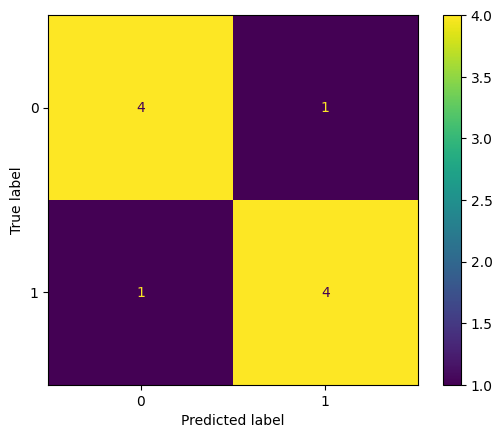

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

cm = confusion_matrix(y_true, y_pred)
goster = ConfusionMatrixDisplay(cm)
goster.plot()
plt.show()

          0  1
0 array([[4, 1],
1        [1, 4]])

## KNN Algoritmasi

![knn](assets/knn.png)

---

![knn](assets/iris.png)  

---

![knn](assets/iris_table.png)

---

https://www.youtube.com/watch?v=ry_NZ8Wuokk

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [8]:
import pandas as pd
data = pd.DataFrame(iris.data)
data.columns=["sepal uzunluk", "sepal genislik", "petal uzunluk", "petal genislik"]
data.head()

,sepal uzunluk,sepal genislik,petal uzunluk,petal genislik
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
etiketler = pd.DataFrame(iris.target)
etiketler.columns = ["etiket"]
etiketler.head()

,etiket
0,0
1,0
2,0
3,0
4,0


In [5]:
df = pd.concat([data,etiketler],axis=1)
df.columns= ["sepal uzunluk", "sepal genislik", "petal uzunluk", "petal genislik", "etiket"]
df.head()

,sepal uzunluk,sepal genislik,petal uzunluk,petal genislik,etiket
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

knn_model = KNN(n_neighbors= 5)

In [ ]:
#egitim ve test verisetini hazirla test_size=0.15 olsun

In [ ]:
#modelin fit fonksiyonu araciligiyla egitim verisini yukle 

In [13]:
#Modelin test verisini kullanarak tahmin etmesini sagla

In [ ]:
#Dogruluk oranini goster

In [14]:
#hata matrisini goster